In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score

In [121]:
data = pd.read_csv('data_banknote_authentication.txt', names = ['variance','skewness','curtosis','entropy','class'])
print(data) # Display data

      variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]


In [122]:
#To know number of rows and columns
data.shape

(1372, 5)

In [123]:
#To get information about our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [124]:
data.isna().sum() 
#This means there is no missing value and data is balanced

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [125]:
print(data.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
1367    False
1368    False
1369    False
1370    False
1371    False
Length: 1372, dtype: bool


In [126]:
data.drop_duplicates(inplace=True)

In [127]:
data['class'].value_counts()

0    738
1    610
Name: class, dtype: int64

In [128]:
# To ignore warnings that appear while running the code
import warnings
warnings.filterwarnings('ignore')

In [129]:
# To get some statistics about dataset
data.describe()

,variance,skewness,curtosis,entropy,class
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712,0.452522
std,2.862906,5.868600,4.328365,2.085877,0.497925
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.786650,-1.627000,-1.545600,-2.393100,0.000000
50%,0.518735,2.334150,0.605495,-0.578890,0.000000
75%,2.853250,6.796025,3.199800,0.403863,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


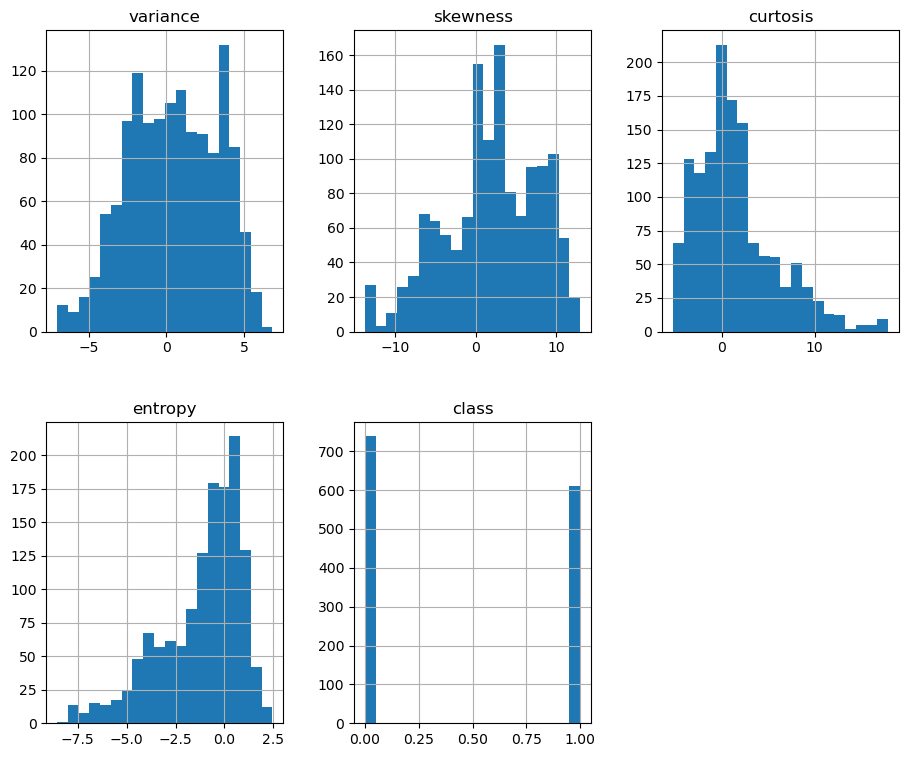

In [130]:
# Visualization of data set
data.hist(bins=20,figsize=(11,9),layout=(2,3));

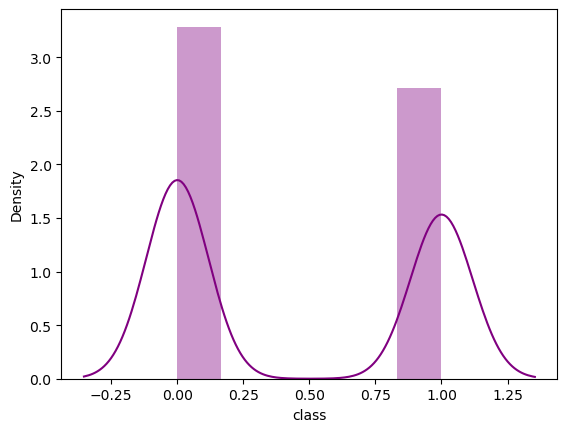

In [131]:
# Visualization for output "class"
import seaborn as sns
sns.distplot(data['class'],color='purple',kde=True);

<AxesSubplot:>

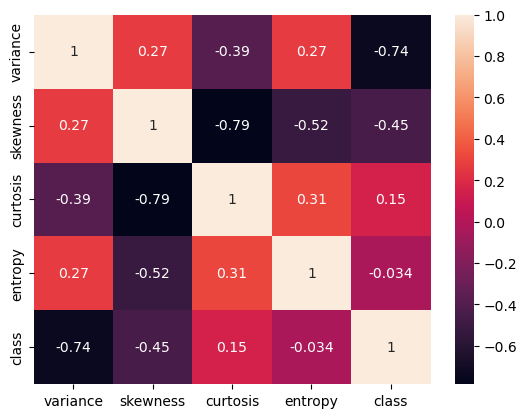

In [132]:
# Visualizatiion of data as a confusion matrix
sns.heatmap(data.corr(),annot=True,cmap='rocket')

Divide the Data into Features and Labels

In [133]:
dataset_features = data.iloc[:, 0:4].values #x
dataset_labels = data.iloc[:, 4].values     #y

In [134]:
# Splitting dataset into training set 70% and test set 30% 
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(dataset_features, dataset_labels, test_size=0.3, random_state=21)


Data Preprocessing

In [135]:
# Normalize Data
from sklearn.preprocessing import StandardScaler
normalization = StandardScaler()
train_features=normalization.fit_transform(train_features)
test_features=normalization.transform(test_features)
dataset_features=normalization.fit_transform(dataset_features)

In [136]:
from sklearn.svm import SVC as svc

#SVM with hard margin  
model_clf1 = svc(kernel='rbf',C= 1e-26) 
model_clf1.fit(train_features, train_labels)
predicted_labels = model_clf1.predict(test_features)
predicted_features = model_clf1.predict(train_features)
acc_1 =cross_val_score(estimator=model_clf1,X=dataset_features,
                       y=dataset_labels,cv=5)
print(acc_1)
print("Accuracy_HardMargin = ",Accuracy*100)

[0.54814815 0.54814815 0.54814815 0.5464684  0.5464684 ]
Accuracy_HardMargin =  53.086419753086425


Error =  [0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.44538706256627786, 0.4

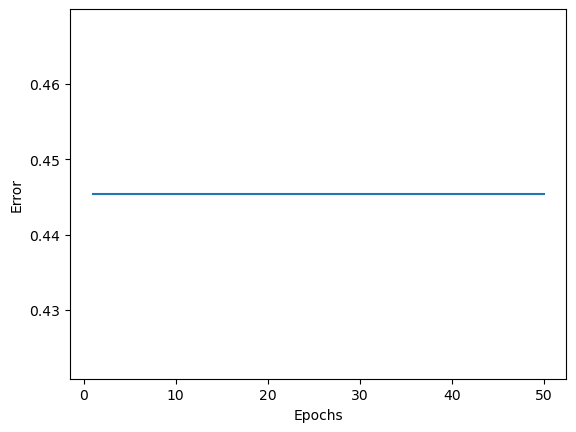

In [137]:
#plot error for hard margin 
from sklearn.metrics import mean_squared_error
error = []
epoch = []
acc_H = []
for l in range(1,51):
    Error = mean_squared_error(train_labels,predicted_features)
    Accuracy=accuracy_score(test_labels, predicted_labels)
    acc_H.append(Accuracy)
    error.append(Error)
    epoch.append(l)
print("Error = ",error)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(epoch,error)
plt.show()

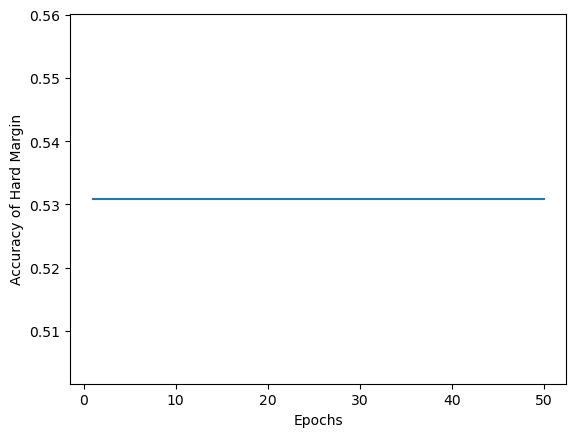

In [138]:
# Plot accuracy for hard margin
plt.xlabel('Epochs')
plt.ylabel('Accuracy of Hard Margin')
plt.plot(epoch,acc_H)
plt.show()

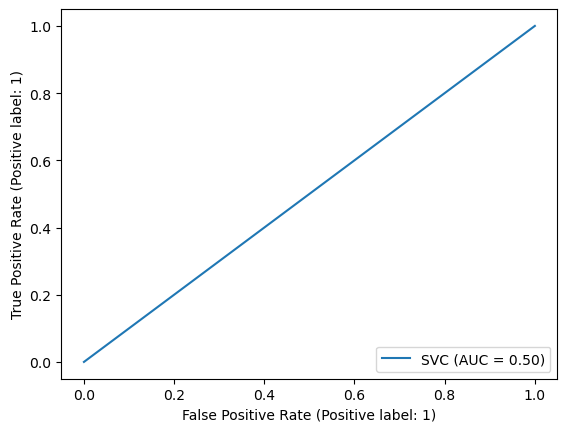

In [139]:
# ROC cirve for Hard Margin
metrics.plot_roc_curve(model_clf1,test_features, test_labels)

In [140]:
#SVM soft margins
model_clf2 = svc(kernel='linear',C=1) 
model_clf2.fit(train_features, train_labels)
predicted_labels2 = model_clf2.predict(test_features)
predicted_features2 = model_clf2.predict(train_features)
acc_2 =cross_val_score(estimator=model_clf2,X=dataset_features,y=dataset_labels,cv=5)
print(acc_2)

[0.98518519 0.99259259 1.         1.         0.98884758]


In [141]:
Accuracy2=accuracy_score(test_labels, predicted_labels2)
print("Accuracy_SoftMargin = ",Accuracy2*100)

Accuracy_SoftMargin =  100.0


Error =  [0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 0.009544008483563097, 

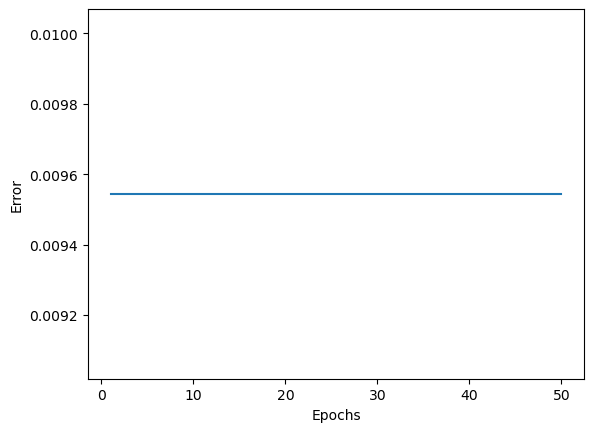

In [142]:
#plot epoch and training set accurecy 
from sklearn.metrics import mean_squared_error
error = []
epoch = []
acc_S = []
for l in range(1,51):
    Error = mean_squared_error(train_labels,predicted_features2)
    Accuracy2=accuracy_score(test_labels, predicted_labels2)
    error.append(Error)
    acc_S.append(Accuracy2)
    epoch.append(l)
print("Error = ",error)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.plot(epoch,error)
plt.show()

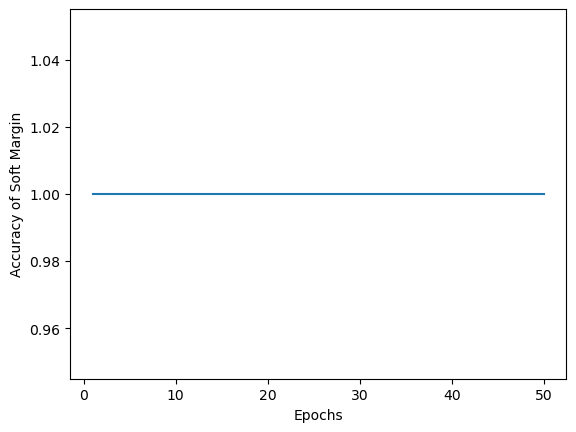

In [143]:
# Plot accuracy for hard margin
plt.xlabel('Epochs')
plt.ylabel('Accuracy of Soft Margin')
plt.plot(epoch,acc_S)
plt.show()

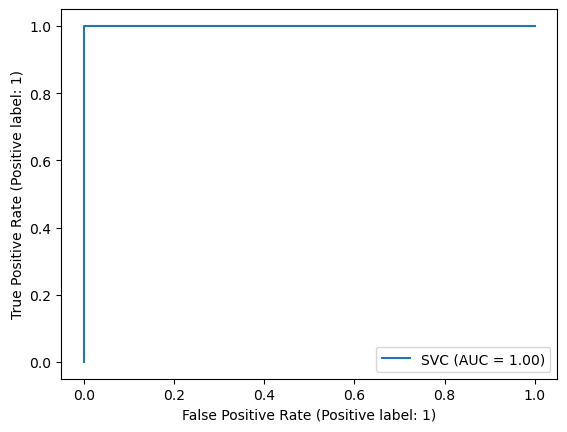

In [144]:
# ROC cirve for Soft Margin
metrics.plot_roc_curve(model_clf2,test_features, test_labels)